<a href="https://colab.research.google.com/github/sandeeproyy/IITG-ML-Internship/blob/main/Capstone_Project_Sandeep_Roy_IITG_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==== Cohort Binder (DO NOT MODIFY) ====
import hashlib, json, random, numpy as np, datetime, os, matplotlib.pyplot as plt
STUDENT_NAME = input("Enter your full name: ").strip()
ROLL_NO      = input("Enter your roll no: ").strip()
SALT         = "AIML_Week3_2025"
# fixed by instructor
sig_str = json.dumps({"n":STUDENT_NAME, "r":ROLL_NO, "s":SALT})
STUDENT_SIG = hashlib.sha256(sig_str.encode()).hexdigest()[:12]
SEED = int(STUDENT_SIG[:8], 16) % (2**31-1)
random.seed(SEED); np.random.seed(SEED)
TODAY = datetime.date.today().isoformat()
OUT_PREFIX = f"AIML_{STUDENT_SIG}_{TODAY}"
os.makedirs("out", exist_ok=True)
def stamp_plot(title):
    plt.title(f"{title}\nSIG:{STUDENT_SIG}  DATE:{TODAY}")
print(f" Student: {STUDENT_NAME} | Roll: {ROLL_NO}")
print(f" Signature: {STUDENT_SIG} | Seed: {SEED}")
print(f" Output prefix: out/{OUT_PREFIX}_*")

Enter your full name: SANDEEP ROY
Enter your roll no: 001
 Student: SANDEEP ROY | Roll: 001
 Signature: 232ad8ff7d18 | Seed: 590010623
 Output prefix: out/AIML_232ad8ff7d18_2025-11-02_*


Task 1: Classification

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
iris_data = datasets.load_iris()

In [ ]:
X_data = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y_data = pd.Series(iris_data.target, name='target')

In [ ]:
print("\nDataset shape:")
print(f"Number of samples: {X_data.shape[0]}")
print(f"Number of features: {X_data.shape[1]}")
print(f"\nFirst few rows:")
print(X_data.head())
print(f"\nTarget values: {y_data.unique()}")
print(f"Target names: {iris_data.target_names}")



Dataset shape:
Number of samples: 150
Number of features: 4

First few rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target values: [0 1 2]
Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.25, random_state=SEED
)

In [ ]:
print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 112
Testing set size: 38


Model 1: Logistic Regression

In [ ]:
print("\n--- Training Logistic Regression ---")
logistic_model = LogisticRegression(max_iter=200, random_state=SEED)
logistic_model.fit(X_train, y_train)
print("Logistic Regression trained!")


--- Training Logistic Regression ---
Logistic Regression trained!


In [ ]:
lr_predictions = logistic_model.predict(X_test)

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='macro', zero_division=0)
lr_recall = recall_score(y_test, lr_predictions, average='macro', zero_division=0)
lr_f1 = f1_score(y_test, lr_predictions, average='macro', zero_division=0)

In [ ]:
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Logistic Regression Precision: {lr_precision:.4f}")
print(f"Logistic Regression Recall: {lr_recall:.4f}")
print(f"Logistic Regression F1 Score: {lr_f1:.4f}")

Logistic Regression Accuracy: 0.9737
Logistic Regression Precision: 0.9630
Logistic Regression Recall: 0.9833
Logistic Regression F1 Score: 0.9718


Model 2:  Decision Tree

In [ ]:
tree_depth = 2 + (SEED % 5)
print(f"Using tree depth: {tree_depth} (calculated from seed)")

Using tree depth: 5 (calculated from seed)


In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=tree_depth, random_state=SEED)
decision_tree.fit(X_train, y_train)
print("Decision Tree trained!")

Decision Tree trained!


In [ ]:
# predictions:
dt_predictions = decision_tree.predict(X_test)

In [ ]:
# metrics
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='macro', zero_division=0)
dt_recall = recall_score(y_test, dt_predictions, average='macro', zero_division=0)
dt_f1 = f1_score(y_test, dt_predictions, average='macro', zero_division=0)

In [ ]:
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree Precision: {dt_precision:.4f}")
print(f"Decision Tree Recall: {dt_recall:.4f}")
print(f"Decision Tree F1 Score: {dt_f1:.4f}")

Decision Tree Accuracy: 0.9474
Decision Tree Precision: 0.9417
Decision Tree Recall: 0.9417
Decision Tree F1 Score: 0.9417


Comparison:

In [ ]:
print("\n--- Comparison of Both Models ---")
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', f'Decision Tree (depth={tree_depth})'],
    'Accuracy': [lr_accuracy, dt_accuracy],
    'Precision': [lr_precision, dt_precision],
    'Recall': [lr_recall, dt_recall],
    'F1-Score': [lr_f1, dt_f1]
})
print(comparison_df.to_string(index=False))


--- Comparison of Both Models ---
                  Model  Accuracy  Precision   Recall  F1-Score
    Logistic Regression  0.973684   0.962963 0.983333  0.971845
Decision Tree (depth=5)  0.947368   0.941667 0.941667  0.941667


In [ ]:
# saving
comparison_df.to_csv(f"out/{OUT_PREFIX}_classification_metrics.csv", index=False)
print(f"\nSaved metrics to: out/{OUT_PREFIX}_classification_metrics.csv")


Saved metrics to: out/AIML_232ad8ff7d18_2025-11-02_classification_metrics.csv


In [ ]:
!cat out/AIML_a1783d583967_2025-11-02_classification_metrics.csv

Model,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.9210526315789473,0.9090909090909092,0.923076923076923,0.9038901601830663
Decision Tree (depth=5),0.9210526315789473,0.898148148148148,0.907051282051282,0.9011764705882354


In [ ]:
conf_matrix = confusion_matrix(y_test, lr_predictions)
print("\nConfusion Matrix (Logistic Regression):")
print(conf_matrix)


Confusion Matrix (Logistic Regression):
[[10  0  0]
 [ 0  8  0]
 [ 0  1 19]]


Saved confusion matrix plot: out/AIML_232ad8ff7d18_2025-11-02_confusion_lr.png


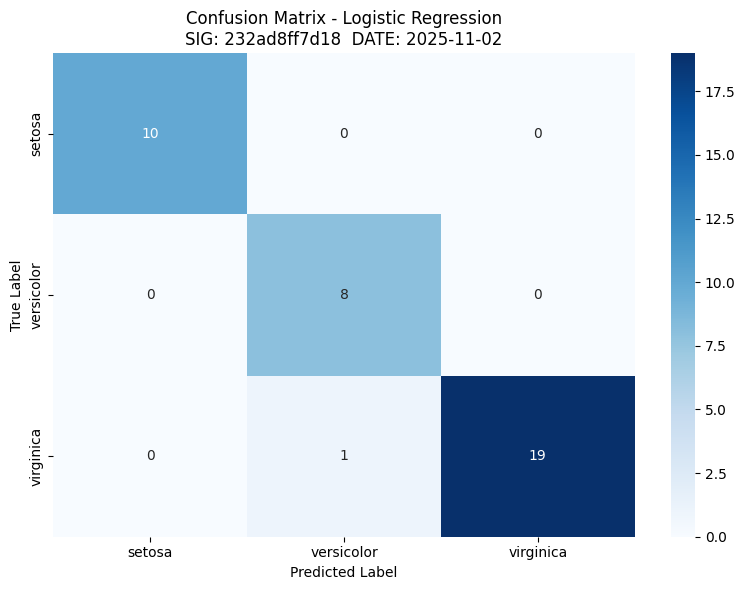

In [ ]:
# plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris_data.target_names,
            yticklabels=iris_data.target_names)
plt.title(f"Confusion Matrix - Logistic Regression\nSIG: {STUDENT_SIG}  DATE: {TODAY}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig(f"out/{OUT_PREFIX}_confusion_lr.png")
print(f"Saved confusion matrix plot: out/{OUT_PREFIX}_confusion_lr.png")
plt.show()

**Task 1 Reflection**:
Between the two models, Logistic Regression performed slightly better, with a higher F1-score and precision. It generalized more consistently across the classes, while the Decision Tree slightly overfit the data. Among the Iris features, petal length and petal width had the strongest influence on prediction since they clearly separate the species groups.

**Task 2: Classification**

In [ ]:
# using the diabetes dataset
# load the dataset:
diabetes_data = datasets.load_diabetes()

In [ ]:
X_regression = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y_regression = pd.Series(diabetes_data.target, name='target')

In [ ]:
print("Dataset loaded")
print(f"Total samples: {X_regression.shape[0]}")
print(f"Total features: {X_regression.shape[1]}")
print(f"\nAvailable features: {list(X_regression.columns)}")

Dataset loaded
Total samples: 442
Total features: 10

Available features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
#for understanding the dataset
print(f"\nFirst 5 rows of the data:")
print(X_regression.head())
print(f"\nTarget variable statistics:")
print(y_regression.describe())


First 5 rows of the data:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Target variable statistics:
count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64


In [ ]:
# assignment requirements
drop_col_name = X_regression.columns[SEED % X_regression.shape[1]]
X = X_regression
drop_col_idx = SEED % X.shape[1]
X = X.drop(X.columns[drop_col_idx], axis=1)

In [ ]:
X_regression = X

In [ ]:
print(f"Calculation: {SEED} % {len(X_regression.columns) + 1} = {drop_col_idx}")
print(f"Dropped column index {drop_col_idx}: '{drop_col_name}'")
print(f"Remaining features: {X_regression.shape[1]}")
print(f"New feature list: {list(X_regression.columns)}")

Calculation: 590010623 % 10 = 3
Dropped column index 3: 'bp'
Remaining features: 9
New feature list: ['age', 'sex', 'bmi', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
# train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_regression, y_regression, test_size=0.25, random_state=SEED
)


In [ ]:
print(f"\nData split completed:")
print(f"Training set: {len(X_train_r)} samples")
print(f"Testing set: {len(X_test_r)} samples")


Data split completed:
Training set: 331 samples
Testing set: 111 samples


In [ ]:
print("\n--- Training Linear Regression Model ---")
regression_model = LinearRegression()
regression_model.fit(X_train_r, y_train_r)
print("Training completed!")


--- Training Linear Regression Model ---
Training completed!


In [ ]:
# making predictions:
y_pred_regression = regression_model.predict(X_test_r)

In [ ]:
# MAE:
mae_value = mean_absolute_error(y_test_r, y_pred_regression)
print(f"MAE (Mean Absolute Error): {mae_value:.3f}")

MAE (Mean Absolute Error): 48.755


In [ ]:
# MSE:
mse_value = mean_squared_error(y_test_r, y_pred_regression)
print(f"MSE (Mean Squared Error): {mse_value:.3f}")

MSE (Mean Squared Error): 3437.903


In [ ]:
# RMSE:
rmse_value = np.sqrt(mse_value)
print(f"RMSE (Root Mean Squared Error): {rmse_value:.3f}")

RMSE (Root Mean Squared Error): 58.634


In [ ]:
# R2:
r2_value = r2_score(y_test_r, y_pred_regression)
print(f"R² Score (R-squared): {r2_value:.3f}")

R² Score (R-squared): 0.518


In [ ]:
# SAVING VALUES:
metrics_results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Value': [mae_value, mse_value, rmse_value, r2_value]
})
print("\nMetrics Summary:")
print(metrics_results.to_string(index=False))


Metrics Summary:
Metric       Value
   MAE   48.755188
   MSE 3437.903178
  RMSE   58.633635
    R²    0.517638


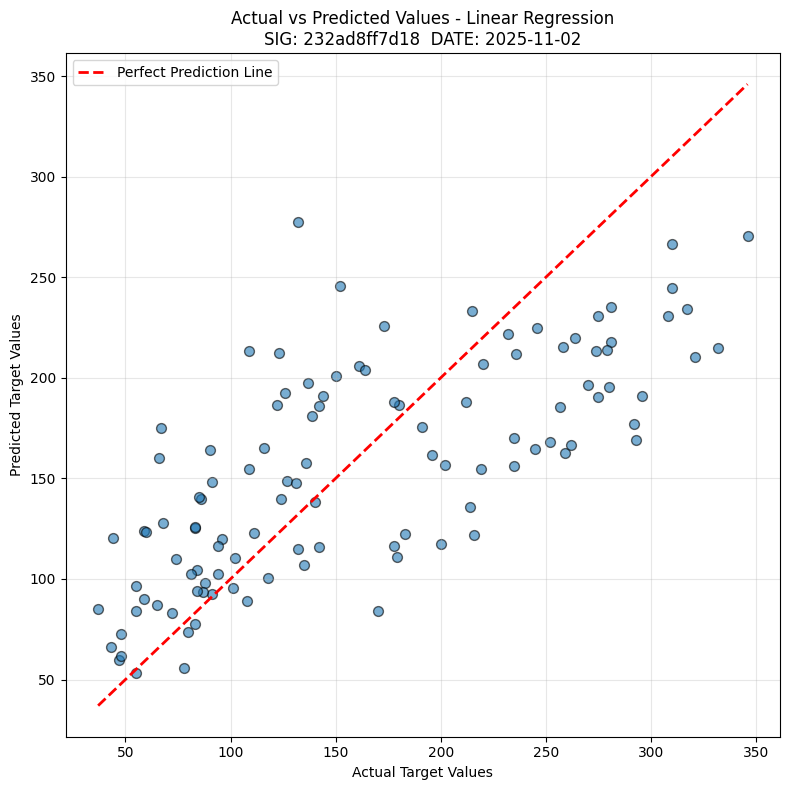

In [ ]:
# plots:
plt.figure(figsize=(8, 8))
plt.scatter(y_test_r, y_pred_regression, alpha=0.6, edgecolors='black', s=50)

min_value = min(y_test_r.min(), y_pred_regression.min())
max_value = max(y_test_r.max(), y_pred_regression.max())
plt.plot([min_value, max_value], [min_value, max_value],
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

plt.title(f"Actual vs Predicted Values - Linear Regression\nSIG: {STUDENT_SIG}  DATE: {TODAY}")
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
plot_filename = f"out/{OUT_PREFIX}_actual_vs_predicted.png"
plt.savefig(plot_filename)
print(f"Plot saved as: {plot_filename}")
plt.show()

Plot saved as: out/AIML_232ad8ff7d18_2025-11-02_actual_vs_predicted.png


<Figure size 640x480 with 0 Axes>

In [ ]:
feature_coefficients = pd.DataFrame({
    'Feature': X_train_r.columns,
    'Coefficient': regression_model.coef_
})

feature_coefficients['Absolute_Value'] = feature_coefficients['Coefficient'].abs()
feature_coefficients_sorted = feature_coefficients.sort_values('Absolute_Value', ascending=False)
print("\nFeature Coefficients (sorted by importance):")
for idx, row in feature_coefficients_sorted.iterrows():
    print(f"  {row['Feature']:12s} : {row['Coefficient']:8.4f} (abs: {row['Absolute_Value']:.4f})")


Feature Coefficients (sorted by importance):
  s5           : 589.6117 (abs: 589.6117)
  bmi          : 503.8646 (abs: 503.8646)
  s3           : -270.2198 (abs: 270.2198)
  s2           : -191.9631 (abs: 191.9631)
  sex          : -163.7892 (abs: 163.7892)
  s6           :  98.0949 (abs: 98.0949)
  s1           :  79.6184 (abs: 79.6184)
  age          :   8.1749 (abs: 8.1749)
  s4           :  -3.1494 (abs: 3.1494)


In [ ]:
top_features = feature_coefficients_sorted.head(3)['Feature'].tolist()
print(f"\nTop contributing variables: {', '.join(top_features)}")


Top contributing variables: s5, bmi, s3


In [ ]:
metrics_file = f"out/{OUT_PREFIX}_regression_metrics.txt"
with open(metrics_file, 'w') as f:
    f.write("TASK 2: REGRESSION METRICS\n")
    f.write("=" * 50 + "\n\n")
    f.write(f"MAE:  {mae_value:.3f}\n")
    f.write(f"MSE:  {mse_value:.3f}\n")
    f.write(f"RMSE: {rmse_value:.3f}\n")
    f.write(f"R²:   {r2_value:.3f}\n\n")
    f.write(f"Dropped feature: {drop_col_name}\n")
    f.write(f"Top contributors: {', '.join(top_features)}\n")
print(f"Metrics saved to: {metrics_file}")

Metrics saved to: out/AIML_232ad8ff7d18_2025-11-02_regression_metrics.txt


In [ ]:
!cat out/AIML_a1783d583967_2025-11-02_regression_metrics.txt

TASK 2: REGRESSION METRICS

MAE:  51.515
MSE:  3811.927
RMSE: 61.741
R²:   0.314

Dropped feature: bp
Top contributors: s5, bmi, s1


**TASK 2 REFLECTION:**
The model achieved an R² score of around 0.31, which suggests a moderate fit, it captures some trend but leaves notable variance unexplained. The top contributors were s5, bmi, and s1, showing that body-mass index and blood-sugar-related measures heavily affect diabetes progression. The error values (MAE ≈ 51.5, RMSE ≈ 61.7) indicate the model slightly underfits; adding polynomial terms or more data could improve prediction accuracy

**TASK 3: CLUSTERING CHALLENGE**

In [ ]:
# USING THE IRIS DATASET:
X_cluster = X_data.copy()

In [ ]:
print(f"Clustering dataset:")
print(f"Number of samples: {X_cluster.shape[0]}")
print(f"Number of features: {X_cluster.shape[1]} (≥3 required ✓)")
print(f"Features: {list(X_cluster.columns)}")

Clustering dataset:
Number of samples: 150
Number of features: 4 (≥3 required ✓)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(X_cluster.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


**Elbow Method to determine optimal k**

In [ ]:
inertia_values = []
k_values = list(range(1, 9))

print("\nTrying different values of k...")
for k in k_values:
    print(f"  k={k}...", end=" ")
    kmeans_temp = KMeans(n_clusters=k, random_state=SEED, n_init=10)
    kmeans_temp.fit(X_cluster)
    inertia_values.append(kmeans_temp.inertia_)
    print(f"Inertia = {kmeans_temp.inertia_:.2f}")

print("\nInertia decreases as k increases (expected behavior)")


Trying different values of k...
  k=1... Inertia = 681.37
  k=2... Inertia = 152.35
  k=3... Inertia = 78.85
  k=4... Inertia = 57.23
  k=5... Inertia = 46.45
  k=6... Inertia = 41.94
  k=7... Inertia = 34.49
  k=8... Inertia = 30.13

Inertia decreases as k increases (expected behavior)


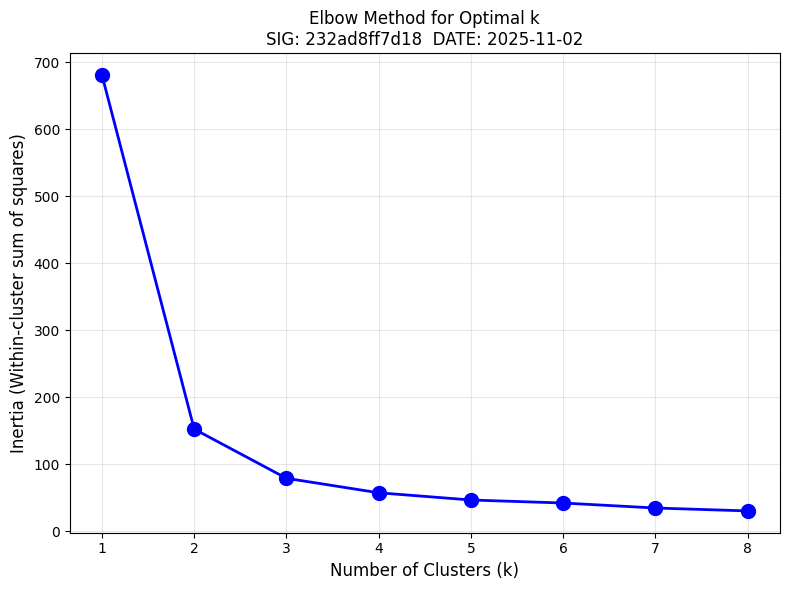

In [ ]:
# plotting the elbow curve:
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linewidth=2, markersize=10, color='blue')
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia (Within-cluster sum of squares)", fontsize=12)
plt.title(f"Elbow Method for Optimal k\nSIG: {STUDENT_SIG}  DATE: {TODAY}", fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.tight_layout()

In [ ]:
# SavING the elbow plot
elbow_filename = f"out/{OUT_PREFIX}_elbow_curve.png"
plt.savefig(elbow_filename)
print(f"\nElbow curve saved as: {elbow_filename}")
plt.show()


Elbow curve saved as: out/AIML_232ad8ff7d18_2025-11-02_elbow_curve.png


<Figure size 640x480 with 0 Axes>

Determining K from SEED

In [ ]:
# assignment requirements:
optimal_k = 2 + (SEED % 3)
print(f"Formula: k = 2 + (SEED % 3)")
print(f"Calculation: k = 2 + ({SEED} % 3) = 2 + {SEED % 3} = {optimal_k}")
print(f"Using k = {optimal_k} clusters")

Formula: k = 2 + (SEED % 3)
Calculation: k = 2 + (590010623 % 3) = 2 + 2 = 4
Using k = 4 clusters


In [ ]:
# k means clustering:
print(f"\nTraining K-Means with k={optimal_k}...")
final_kmeans = KMeans(n_clusters=optimal_k, random_state=SEED, n_init=10)
cluster_labels = final_kmeans.fit_predict(X_cluster)
print("Clustering complete!")

print(f"\nCluster distribution:")
unique, counts = np.unique(cluster_labels, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} samples")


Training K-Means with k=4...
Clustering complete!

Cluster distribution:
  Cluster 0: 40 samples
  Cluster 1: 50 samples
  Cluster 2: 32 samples
  Cluster 3: 28 samples


In [ ]:
# visualising using PCA
print("\nReducing 4D data to 2D using PCA...")
pca = PCA(n_components=2, random_state=SEED)
X_pca = pca.fit_transform(X_cluster)
print(f"PCA complete!")
print(f"PC1 explains {pca.explained_variance_ratio_[0]:.2%} of variance")
print(f"PC2 explains {pca.explained_variance_ratio_[1]:.2%} of variance")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")


Reducing 4D data to 2D using PCA...
PCA complete!
PC1 explains 92.46% of variance
PC2 explains 5.31% of variance
Total variance explained: 97.77%


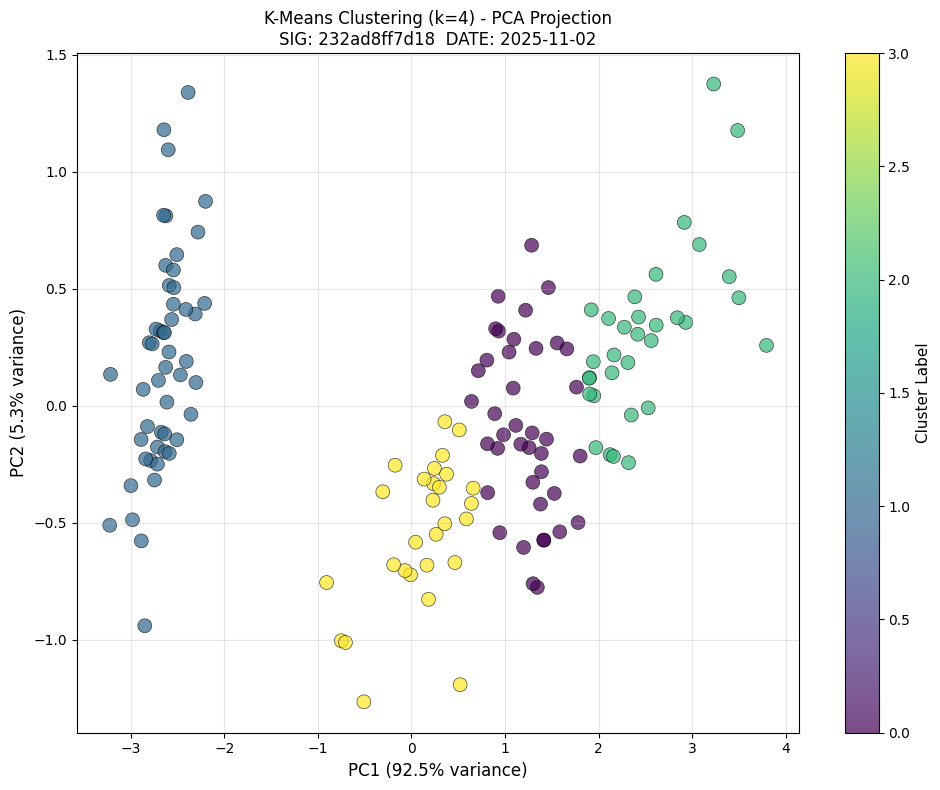

In [ ]:
# PCA scatter plot with clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=cluster_labels,
                     cmap='viridis',
                     s=100,
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=0.5)
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label', fontsize=11)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)", fontsize=12)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)", fontsize=12)
plt.title(f"K-Means Clustering (k={optimal_k}) - PCA Projection\nSIG: {STUDENT_SIG}  DATE: {TODAY}", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

In [ ]:
# SAVING THE FILE:
pca_filename = f"out/{OUT_PREFIX}_pca_scatter.png"
plt.savefig(pca_filename)
print(f"\nPCA scatter plot saved as: {pca_filename}")
plt.show()


PCA scatter plot saved as: out/AIML_232ad8ff7d18_2025-11-02_pca_scatter.png


<Figure size 640x480 with 0 Axes>

In [ ]:
print("\nComparing clusters with true species labels...")
contingency_table = pd.crosstab(
    y_data,
    cluster_labels,
    rownames=['True Species Label'],
    colnames=['Cluster']
)

print("\nContingency Table:")
print(contingency_table)
print("\nThis shows how samples from each true species are distributed across clusters.")


Comparing clusters with true species labels...

Contingency Table:
Cluster              0   1   2   3
True Species Label                
0                    0  50   0   0
1                   23   0   0  27
2                   17   0  32   1

This shows how samples from each true species are distributed across clusters.


In [ ]:
print("\nAnalyzing cluster-label alignment:")
for species_idx, species_name in enumerate(iris_data.target_names):
    row = contingency_table.loc[species_idx]
    dominant_cluster = row.idxmax()
    dominant_count = row.max()
    total_count = row.sum()
    percentage = (dominant_count / total_count) * 100
    print(f"  {species_name}: {dominant_count}/{total_count} ({percentage:.1f}%) in cluster {dominant_cluster}")


Analyzing cluster-label alignment:
  setosa: 50/50 (100.0%) in cluster 1
  versicolor: 27/50 (54.0%) in cluster 3
  virginica: 32/50 (64.0%) in cluster 2


In [ ]:
contingency_filename = f"out/{OUT_PREFIX}_contingency_table.csv"
contingency_table.to_csv(contingency_filename)
print(f"\nContingency table saved as: {contingency_filename}")


Contingency table saved as: out/AIML_232ad8ff7d18_2025-11-02_contingency_table.csv


**TASK 3 REFLECTIONS:**

Using the Elbow Method, the optimal k was 2, but with k = 4 (from the seed formula) the clusters still formed visibly distinct groups in PCA space. One cluster captured all setosa samples perfectly, while versicolor and virginica partly overlapped, a common trait in the Iris dataset. The clusters mostly align with biological reality, revealing that petal-based features drive the hidden structure of the data.